<a href="https://colab.research.google.com/github/sudeep-009/Transport-Demand-Prediction-Regression-Capstone-Project/blob/dev/Copy_of_Demand_Prediction_for_Public_Transport_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Traffic Jam: Predicting People's Movement into Nairobi </u></b>

## <b> Problem Description </b>

### This challenge asks you to build a model that predicts the number of seats that Mobiticket can expect to sell for each ride, i.e. for a specific route on a specific date and time. There are 14 routes in this dataset. All of the routes end in Nairobi and originate in towns to the North-West of Nairobi towards Lake Victoria.


### The towns from which these routes originate are:

* Awendo
* Homa Bay
* Kehancha
* Kendu Bay
* Keroka
* Keumbu
* Kijauri
* Kisii
* Mbita
* Migori
* Ndhiwa
* Nyachenge
* Oyugis
* Rodi
* Rongo
* Sirare
* Sori

### The routes from these 14 origins to the first stop in the outskirts of Nairobi takes approximately 8 to 9 hours from time of departure. From the first stop in the outskirts of Nairobi into the main bus terminal, where most passengers get off, in Central Business District, takes another 2 to 3 hours depending on traffic.

### The three stops that all these routes make in Nairobi (in order) are:

1. Kawangware: the first stop in the outskirts of Nairobi
2. Westlands
3. Afya Centre: the main bus terminal where most passengers disembark

### All of these points are mapped [here](https://www.google.com/maps/d/viewer?mid=1Ef2pFdP8keVHHid8bwju2raoRvjOGagN&ll=-0.8281897101491997%2C35.51706279999996&z=8).

### Passengers of these bus (or shuttle) rides are affected by Nairobi traffic not only during their ride into the city, but from there they must continue their journey to their final destination in Nairobi wherever that may be. Traffic can act as a deterrent for those who have the option to avoid buses that arrive in Nairobi during peak traffic hours. On the other hand, traffic may be an indication for people’s movement patterns, reflecting business hours, cultural events, political events, and holidays.

## <b> Data Description </b>

### <b>Nairobi Transport Data.csv (zipped)</b> is the dataset of tickets purchased from Mobiticket for the 14 routes from “up country” into Nairobi between 17 October 2017 and 20 April 2018. This dataset includes the variables: ride_id, seat_number, payment_method, payment_receipt, travel_date, travel_time, travel_from, travel_to, car_type, max_capacity.


### Uber Movement traffic data can be accessed [here](https://movement.uber.com). Data is available for Nairobi through June 2018. Uber Movement provided historic hourly travel time between any two points in Nairobi. Any tables that are extracted from the Uber Movement platform can be used in your model.

### Variables description:

* #### ride_id: unique ID of a vehicle on a specific route on a specific day and time.
* #### seat_number: seat assigned to ticket
* #### payment_method: method used by customer to purchase ticket from Mobiticket (cash or Mpesa)
* #### payment_receipt: unique id number for ticket purchased from Mobiticket
* #### travel_date: date of ride departure. (MM/DD/YYYY)
* #### travel_time: scheduled departure time of ride. Rides generally depart on time. (hh:mm)
* #### travel_from: town from which ride originated
* #### travel_to: destination of ride. All rides are to Nairobi.
* #### car_type: vehicle type (shuttle or bus)
* #### max_capacity: number of seats on the vehicle

In [ ]:
import warnings
warnings.filterwarnings("ignore") 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.style.use('ggplot')
import seaborn as sns
sns.set_theme(style="whitegrid")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
transport_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AlmaBetter/Capstone Projects/Traffic Demand Prediction-Capstone/train_revised.csv')

#**First lets understand the given dataset**

####**Lets explore few rows of our dataset**

In [ ]:
pd.concat([transport_df.head(),transport_df.tail()])

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49
51644,14304,7,Mpesa,AQN7FBUSGP,14-11-17,5:10,Kisii,Nairobi,Bus,49


**Lets see the number of records present in the given dataset**

In [ ]:
print('Number of features present in the dataset:{}'.format(transport_df.shape[1]))
print('Number of records present in the dataset:{}'.format(transport_df.shape[0]))

Number of features present in the dataset:10
Number of records present in the dataset:51645


**Features Name present in the dataset**

In [ ]:
for i in transport_df.columns:
  print(i)

ride_id
seat_number
payment_method
payment_receipt
travel_date
travel_time
travel_from
travel_to
car_type
max_capacity


**Null Value Detection**

In [ ]:
#detecting null values present in any of the columns
transport_df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

**Finding:** There is no null value present in any of the features of the dataset.

In [ ]:
#concise summary of the dataset
transport_df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


**Findings:**

1. Two type of payment method.
2. Only 149 days record is available.
3. There are 17 distinct origin.
4. There are 2 type of vehicle.
5. Only one destination Nairobi.
6. Bus is more in number.


**Type, Null Count, Non Null Count, Unique Count of Features present in the dataset**

In [ ]:
def info(dataset):
  info_df = pd.DataFrame(columns={'Type','Null Count','Non Null Count','Unique Count'},index=dataset.columns)
  info_df['Type'] = dataset.dtypes
  info_df['Null Count'] = dataset.isnull().sum()
  info_df['Non Null Count'] = len(dataset) - dataset.isnull().sum()
  info_df['Unique Count'] = dataset.nunique()
  return info_df

In [ ]:
info(transport_df).T

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
Unique Count,6249,61,2,51645,149,78,17,1,2,2
Null Count,0,0,0,0,0,0,0,0,0,0
Type,int64,object,object,object,object,object,object,object,object,int64
Non Null Count,51645,51645,51645,51645,51645,51645,51645,51645,51645,51645


**Findings:**

1.    No Null Values are  present in the dataset.
2.    Maximum features are of categorical type.
3.    Two types of payment method.
4.    17 Unique Origin.
5.    1 Destination for all Origin
6.    2 Types of Vehicle.

#**EDA and Features Selection**

**Payment,CarType and Maximum Capacity**

In [ ]:
#count of unique values
value_count_cols = ['payment_method','car_type','max_capacity']
for value in value_count_cols:
  print(transport_df[value].value_counts())

Mpesa    51532
Cash       113
Name: payment_method, dtype: int64
Bus        31985
shuttle    19660
Name: car_type, dtype: int64
49    31985
11    19660
Name: max_capacity, dtype: int64


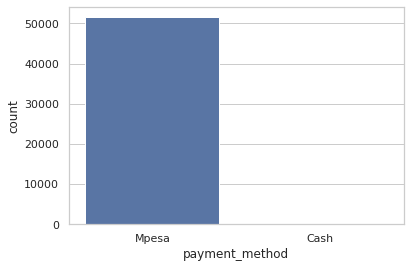

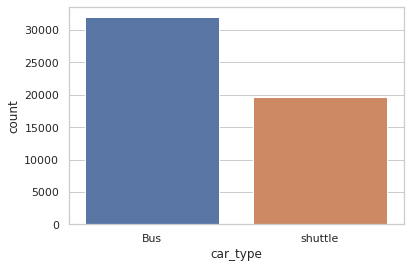

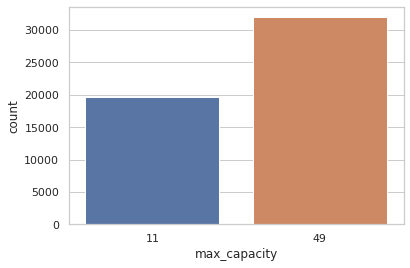

In [ ]:
plot_count_cols = ['payment_method','car_type','max_capacity']
for plots in plot_count_cols:
  sns.countplot(transport_df[plots])
  plt.show()

**Findings:**
1. Peoples are highly aware about digital payment.Do not prefer to pay in cash.
2. Count of Bus is more than Shuttle.
3. As almost all the peoples are paying digitally hence we will drop this feature as it is almost constant.

In [ ]:
#dropping column payment_method
transport_df.drop('payment_method',axis=1,inplace=True)

**Correlation between max_capacity and car_type**

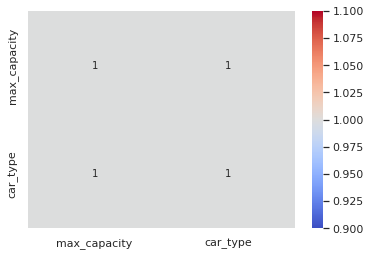

In [ ]:
#finding correlation between max capacity and car type
sns.heatmap(transport_df[['max_capacity','car_type']].apply(lambda x : pd.factorize(x)[0]).corr(method='spearman', min_periods=1),cmap='coolwarm',annot=True)

**Finding:** As the two features are completely correlated hence we will drop one of them

In [ ]:
#dropping car type from feature list
transport_df.drop('car_type',axis=1,inplace=True)

**Count of Unique Origin**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 <a list of 17 Text major ticklabel objects>)

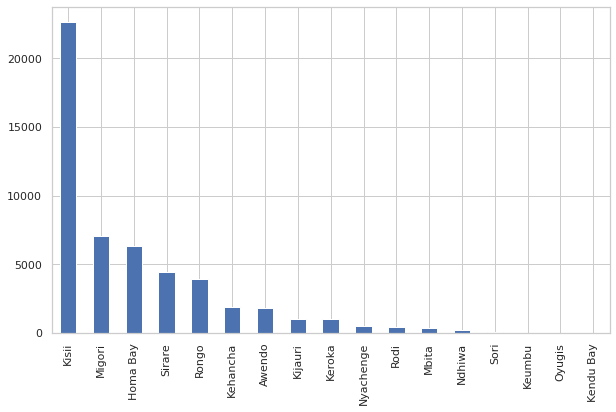

In [ ]:
plt.figure(figsize=(10,6))
transport_df['travel_from'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)

**Findings:**
1. Some Origins have negligible impact on demand. Showing very less transit between them and Nairobi
2. Kisii is the most popular Origin. Having frequent availability of transportation vehicle.
3. Plugging less popular origin into one unit.

In [ ]:
#plugging less popular origin into one unit called other
# modify_origin = {'Nyachenge': 'other', 'Rodi': 'other', 'Mbita': 'other', 'Ndhiwa': 'other', 'Sori': 'other', 'Keumbu': 'other', 'Oyugis': 'other', 'Kendu Bay': 'other' }
# transport_df['travel_from'] = transport_df['travel_from'].replace(modify_origin)

In [ ]:
# transport_df['travel_from'].unique()

**Travel Time**

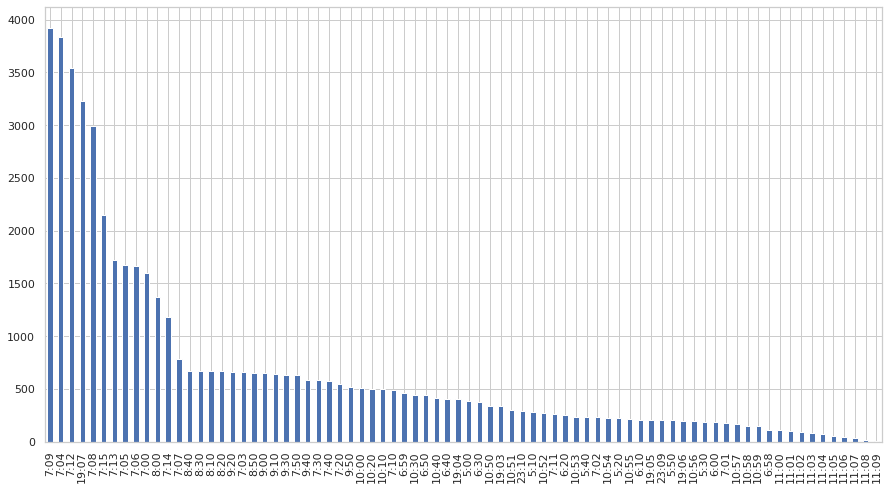

In [ ]:
plt.figure(figsize=(15,8))
transport_df['travel_time'].value_counts().plot(kind='bar')
plt.xticks(rotation=90)
plt.show()

**Findings:**

1. Count of Public transport vehicle is high during the morning time till 10 am in the morning.
2. There is no public transport during the midnight. 
3. Last availability is at 11:09 pm in the night.

**Dropping of Features**
1. Destination point: As this feature has a constant value i.e Nairobi
2. Payment Receipt: As it is categorical and  all the values are different.

In [ ]:
#dropping features
transport_df.drop(['travel_to','payment_receipt'],axis=1,inplace=True)

##**Determining Target Variable:**

Predicting demand of a particular ride means predicting a demand at a particular date and time for a  specific route

Now we can understand Demand here as a number of booking made for each ride. For this we will build a new dataset by grouping the rideId and all other features and then aggregating number of seat booked in a given ride. By doing this we will get out target variable in the form of number of booking for a given at a given time and data for a particular route.

In [ ]:
transform_df = transport_df.groupby(['ride_id','travel_from','travel_date','travel_time','max_capacity']).agg({"seat_number": "count"}).reset_index()

In [ ]:
transform_df.rename(columns={'seat_number': 'target'},inplace=True)

In [ ]:
transform_df.head()

,ride_id,travel_from,travel_date,travel_time,max_capacity,target
0,1442,Migori,17-10-17,7:15,49,1
1,5437,Migori,19-11-17,7:12,49,1
2,5710,Keroka,26-11-17,7:05,49,1
3,5777,Homa Bay,27-11-17,7:10,49,5
4,5778,Migori,27-11-17,7:12,49,31


**Number of duplicate value in the dataset**

In [ ]:
transform_df.duplicated( keep='first').sum()

0

**Shape of a transform dataframe**

In [ ]:
#shape of transform dataframe
transform_df.shape

(6249, 6)

In [ ]:
#concise summary of dataframe
transform_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6249 entries, 0 to 6248
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ride_id       6249 non-null   int64 
 1   travel_from   6249 non-null   object
 2   travel_date   6249 non-null   object
 3   travel_time   6249 non-null   object
 4   max_capacity  6249 non-null   int64 
 5   target        6249 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 293.0+ KB


**Data Cleaning**

In [ ]:
#Check if Bookings more than maximum seat.
More_Bookings_less_seat=transform_df[transform_df['max_capacity']<transform_df['target']].index
display(transform_df[transform_df['max_capacity']<transform_df['target']], More_Bookings_less_seat,len(More_Bookings_less_seat))

,ride_id,travel_from,travel_date,travel_time,max_capacity,target
1668,8124,Kisii,13-02-18,7:00,11,12
1922,8454,Sirare,09-01-18,7:00,49,50
1976,8528,Kisii,07-02-18,9:30,11,12
2064,8642,Kisii,05-02-18,10:30,11,12
2073,8651,Kisii,05-02-18,9:10,11,12
2163,8773,Kisii,04-02-18,10:51,11,12
2339,9011,Kisii,31-01-18,9:50,11,12
3639,10689,Kisii,20-12-17,10:00,11,12
3772,10847,Kisii,19-12-17,7:20,11,12
4131,11279,Kisii,14-12-17,10:57,11,12


Int64Index([1668, 1922, 1976, 2064, 2073, 2163, 2339, 3639, 3772, 4131, 4421,
            4666, 5016],
           dtype='int64')

13

##**Feature Engineering**

In [ ]:
#date column which will be addition of date column and time column
transform_df['date'] = transform_df['travel_date']+' '+transform_df['travel_time']

In [ ]:
def  time_features(df): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df["date"]=pd.to_datetime(df["date"])
  df["day_of_week"]=df["date"].dt.dayofweek
  df["year"]=df["date"].dt.year
  df["month"]=df["date"].dt.month
  return df

In [ ]:
time_features(transform_df)

,ride_id,travel_from,travel_date,travel_time,max_capacity,target,date,day_of_week,year,month
0,1442,Migori,17-10-17,7:15,49,1,2017-10-17 07:15:00,1,2017,10
1,5437,Migori,19-11-17,7:12,49,1,2017-11-19 07:12:00,6,2017,11
2,5710,Keroka,26-11-17,7:05,49,1,2017-11-26 07:05:00,6,2017,11
3,5777,Homa Bay,27-11-17,7:10,49,5,2017-11-27 07:10:00,0,2017,11
4,5778,Migori,27-11-17,7:12,49,31,2017-11-27 07:12:00,0,2017,11
...,...,...,...,...,...,...,...,...,...,...
6244,20113,Kisii,07-02-18,7:00,11,9,2018-07-02 07:00:00,0,2018,7
6245,20114,Kisii,12-12-17,7:10,49,4,2017-12-12 07:10:00,1,2017,12
6246,20115,Kisii,06-12-17,7:10,11,5,2017-06-12 07:10:00,0,2017,6
6247,20116,Kisii,27-11-17,7:10,11,1,2017-11-27 07:10:00,0,2017,11


In [ ]:
#dropping feature travel_date, date, ride_id
transform_df.drop(['travel_date','ride_id','date'],axis=1,inplace=True)

In [ ]:
#Calculating boarding time in interger type
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: x.split(':'))
transform_df['travel_time'] = transform_df['travel_time'].apply(lambda x: int(x[0])*60 + int(x[1]))

In [ ]:
transform_df['boarding_time(hr)'] = transform_df['travel_time'].apply(lambda x: round(x/60,2))

**Boarding Period according to boarding time**

In [ ]:
#New feature known as boarding period which could be formed with the help of boarding time
transform_df['boarding period'] = transform_df['boarding_time(hr)'].apply(lambda x: 'Morning' if (5<x<=11) else('AfterNoon' if (11<x<=17) else('Evening' if (17<x<=23) else 'Night')))

In [ ]:
bcount = dict(transform_df['boarding period'].value_counts())
bcount

{'AfterNoon': 72, 'Evening': 225, 'Morning': 5730, 'Night': 222}

In [ ]:
transform_df.head()

,travel_from,travel_time,max_capacity,target,day_of_week,year,month,boarding_time(hr),boarding period
0,Migori,435,49,1,1,2017,10,7.25,Morning
1,Migori,432,49,1,6,2017,11,7.20,Morning
2,Keroka,425,49,1,6,2017,11,7.08,Morning
3,Homa Bay,430,49,5,0,2017,11,7.17,Morning
4,Migori,432,49,31,0,2017,11,7.20,Morning


**Calculating the distance between each of the origin and destination**

In [ ]:
#TIME FEATURES
time_features = ['day_of_week','month','year','boarding_time(hr)']

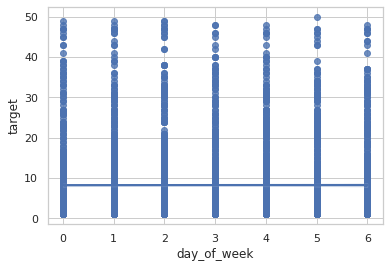

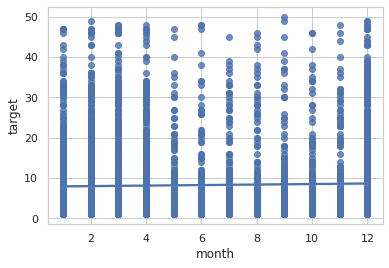

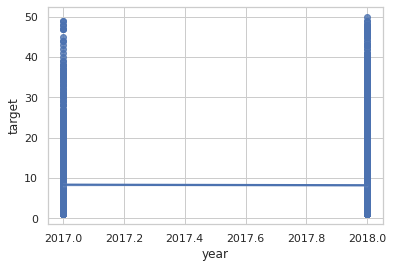

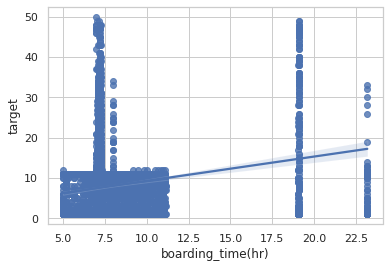

In [ ]:
for i in time_features:
  sns.regplot(x=transform_df[i],y=transform_df['target'])
  plt.show()

**Findings:**
1. There is no data available for the peroid of 5-11 of every month. May be because of holiday.
2. There is high avaliability during the morning hours because people move toward their work place during these hours.
3. Demand seems to be very high during the evening and night as the availabitly is very low during these hours.

**Distribution of booking among categorical features**

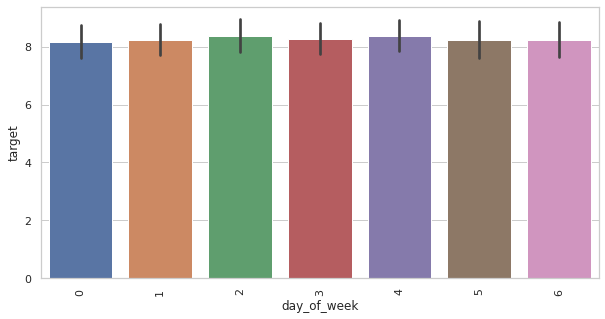

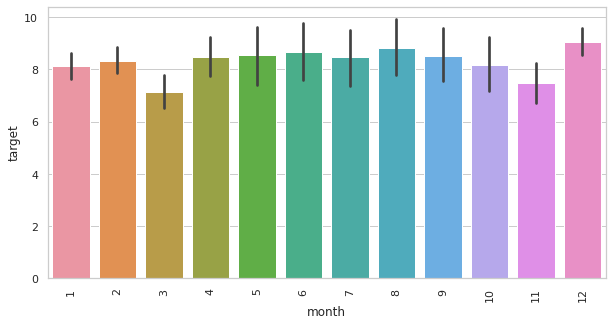

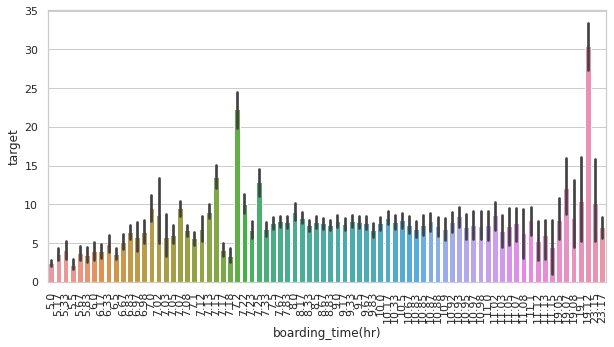

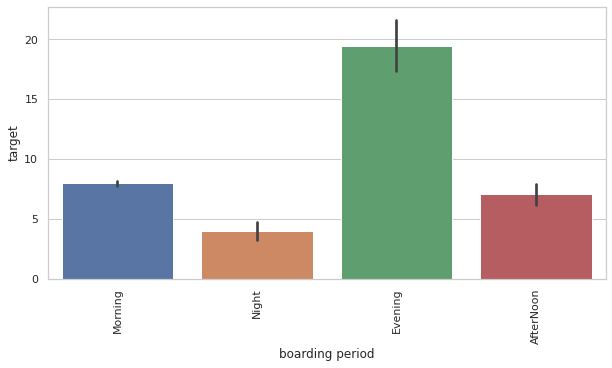

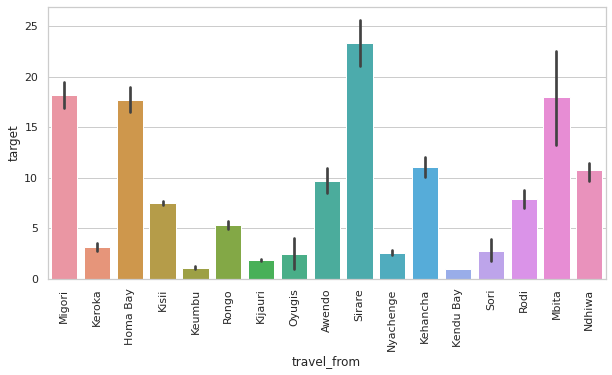

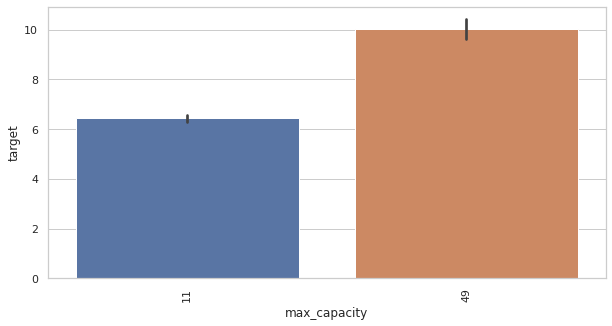

In [ ]:
# FEATURES
features = ['day_of_week','month','boarding_time(hr)','boarding period','travel_from','max_capacity']
for i in features:
  plt.figure(figsize=(10,5))
  sns.barplot(x=transform_df[i],y=transform_df['target'])
  plt.xticks(rotation=90)
  plt.show()

**Findings:**
1. Demand is very high during the evening time as the avaliabilty is low.
2. Also Demand from Sirare, Migori, Homa Bay  and Kehancha is high.

**Understanding Vehicle availability**

travel_from


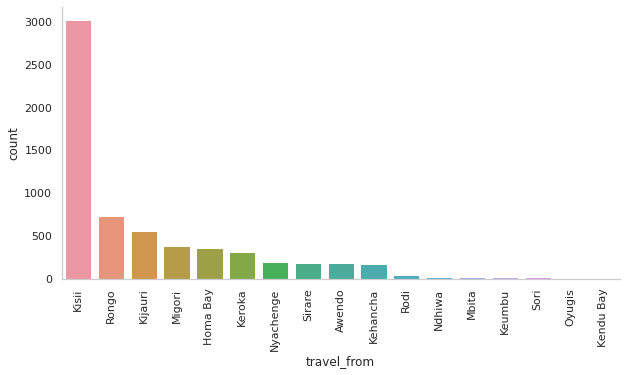

max_capacity


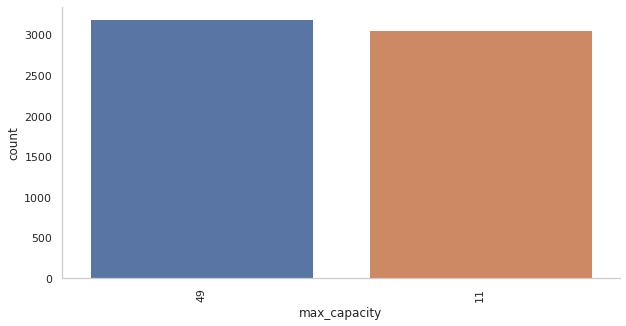

year


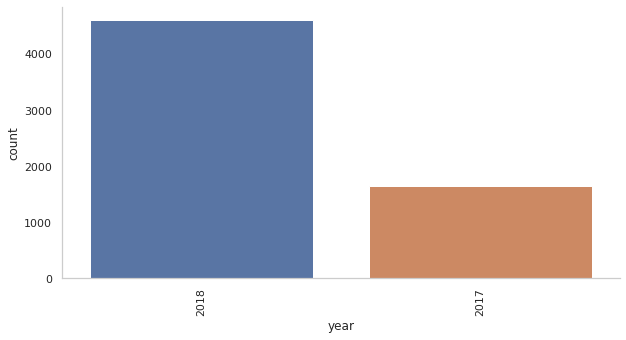

month


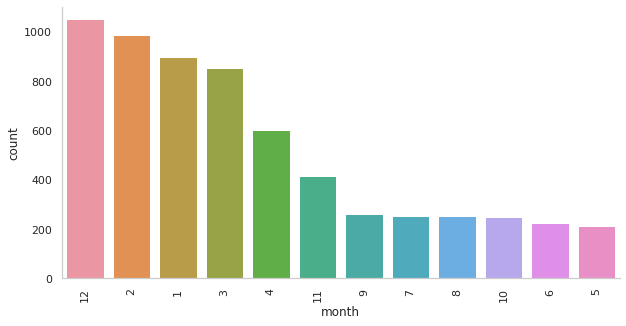

day_of_week


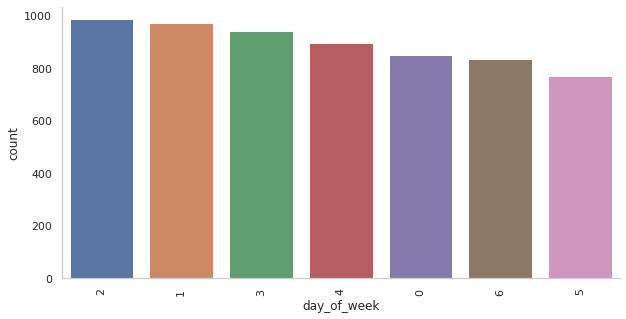

boarding period


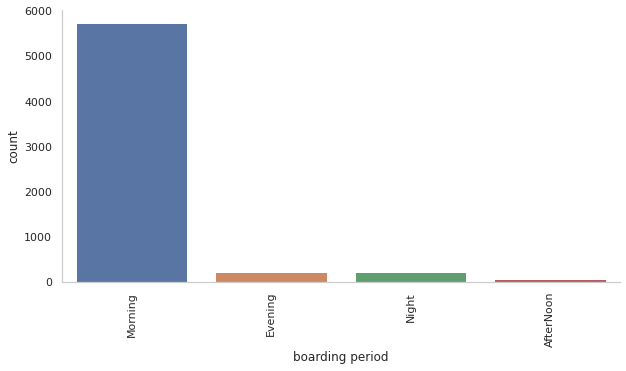

In [ ]:
for i in transform_df[["travel_from",	"max_capacity",	"year", "month","day_of_week",	"boarding period"]]:
  print(i)
  fig, ax = plt.subplots(figsize=(10, 5))
  sns.countplot(data=transform_df,x=i,ax=ax,order = transform_df[i].value_counts().index)
  sns.despine()
  plt.grid(False)
  plt.xticks(rotation=90)
  plt.show()

**Findings:**

1. Very high availability of vehicle between Kissi and Nairobi.
2. Vehicle type feature looks balance.
3. We have more data from the year 2018 than 2017.Imbalance feature.
4. The month of jan,feb,march,apr and december have more number of available vehicle for transportation.
5. There is no pattern in day_ofweek it looks equally distributed(balanced).
6. High availability of vehicle during morning hour as it is time when people go for their work and student move toward their school and colleges.

**DataSet Distribution**

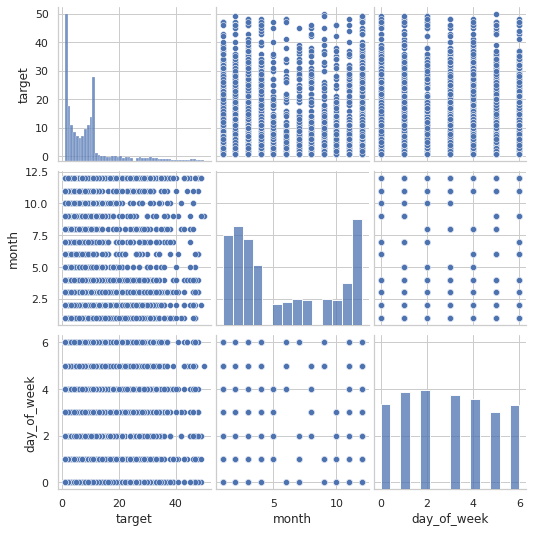

In [ ]:
#dataset distribution
Plot=transform_df[["target","boarding period",'travel_from', 'month','day_of_week']]
sns.pairplot(Plot)
plt.show()

**Findings:** Dataset is neither linear nor normally distributed

**Feature Selection**
We will use three methods for feature selection:

1. Remove collinear features
2. Remove features with greater than a threshold percentage of missing values
3. Keep only the most relevant features using feature importances from a model


In [ ]:
#labelling month in ordinal
month_dict = {1:2,2:3,3:2,4:2,5:1,6:1,7:1,8:1,9:1,10:1,11:2,12:3}
day_of_week_dict = {1:"MON",2:"TUE",3:"WED",4:"THRU",5:"FRI",6:"SAT",0:"SUN"}
transform_df['month'].replace(month_dict,inplace=True)
transform_df['day_of_week'].replace(day_of_week_dict,inplace=True)

**labelling maximum capacity**

In [ ]:
transform_df.max_capacity.value_counts()

49    3189
11    3060
Name: max_capacity, dtype: int64

In [ ]:
fil1 = transform_df['max_capacity'] == 49
fil2= transform_df["max_capacity"]==11
transform_df.loc[fil1, 'max_capacity'] = 1
transform_df.loc[fil2,'max_capacity']=2
transform_df['max_capacity'].value_counts()

1    3189
2    3060
Name: max_capacity, dtype: int64

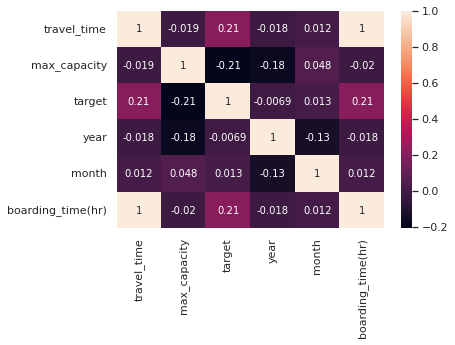

In [ ]:
sns.heatmap(transform_df.corr(),annot=True)
plt.show()

In [ ]:
transform_df.drop(["year",'boarding_time(hr)','travel_time'],axis=1,inplace=True)

In [ ]:
transform_df.head()

,travel_from,max_capacity,target,day_of_week,month,boarding period
0,Migori,1,1,MON,1,Morning
1,Migori,1,1,SAT,2,Morning
2,Keroka,1,1,SAT,2,Morning
3,Homa Bay,1,5,SUN,2,Morning
4,Migori,1,31,SUN,2,Morning


**Feature Selection using Random Forest**

In [ ]:
one_hot = pd.get_dummies(transform_df[["travel_from","boarding period","day_of_week"]],drop_first=True)
one_hot=pd.DataFrame(one_hot)
one_hot

,travel_from_Homa Bay,travel_from_Kehancha,travel_from_Kendu Bay,travel_from_Keroka,travel_from_Keumbu,travel_from_Kijauri,travel_from_Kisii,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,...,travel_from_Sori,boarding period_Evening,boarding period_Morning,boarding period_Night,day_of_week_MON,day_of_week_SAT,day_of_week_SUN,day_of_week_THRU,day_of_week_TUE,day_of_week_WED
0,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6245,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,0
6246,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
6247,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
from sklearn.ensemble import RandomForestClassifier

features = np.array(one_hot.columns)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(one_hot, transform_df["target"])

RandomForestClassifier()

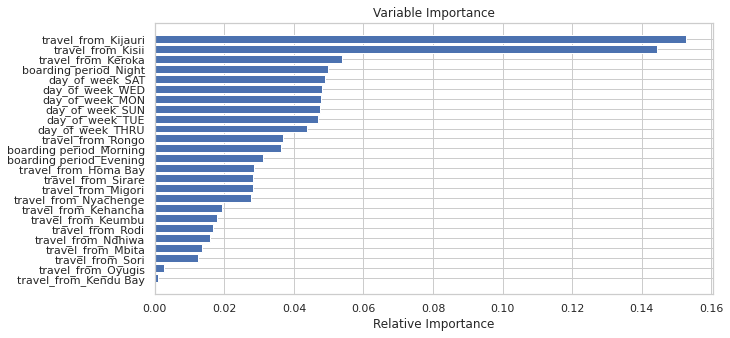

In [ ]:
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)
plt.figure(figsize=(10, 5))
padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("Variable Importance")
plt.show()

**Important Features**

In [ ]:
['travel_from_Homa Bay', 
       'travel_from_Keroka',  'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Migori',
        'travel_from_Nyachenge', 
       'travel_from_Rongo', 'travel_from_Sirare',
       'boarding period_Morning', 
       'boarding period_Evening', 'day_of_week_MON', 'day_of_week_SAT',
       'day_of_week_SUN', 'day_of_week_THRU', 'day_of_week_TUE',
       'day_of_week_WED']

['travel_from_Homa Bay',
 'travel_from_Keroka',
 'travel_from_Kijauri',
 'travel_from_Kisii',
 'travel_from_Migori',
 'travel_from_Nyachenge',
 'travel_from_Rongo',
 'travel_from_Sirare',
 'boarding period_Morning',
 'boarding period_Evening',
 'day_of_week_MON',
 'day_of_week_SAT',
 'day_of_week_SUN',
 'day_of_week_THRU',
 'day_of_week_TUE',
 'day_of_week_WED']

In [ ]:
one_hot_imp=one_hot.copy()
one_hot_imp=one_hot[['travel_from_Homa Bay', 
       'travel_from_Keroka',  'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Migori',
        'travel_from_Nyachenge', 
       'travel_from_Rongo', 'travel_from_Sirare',
       'boarding period_Evening', 
       'boarding period_Morning', 'day_of_week_MON', 'day_of_week_SAT',
       'day_of_week_SUN', 'day_of_week_THRU', 'day_of_week_TUE',
       'day_of_week_WED']]
one_hot_imp.head() 

,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,boarding period_Evening,boarding period_Morning,day_of_week_MON,day_of_week_SAT,day_of_week_SUN,day_of_week_THRU,day_of_week_TUE,day_of_week_WED
0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0


In [ ]:
final_df = pd.concat([transform_df[["target","max_capacity","month"]], one_hot_imp], axis=1)
final_df

,target,max_capacity,month,travel_from_Homa Bay,travel_from_Keroka,travel_from_Kijauri,travel_from_Kisii,travel_from_Migori,travel_from_Nyachenge,travel_from_Rongo,travel_from_Sirare,boarding period_Evening,boarding period_Morning,day_of_week_MON,day_of_week_SAT,day_of_week_SUN,day_of_week_THRU,day_of_week_TUE,day_of_week_WED
0,1,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0
1,1,1,2,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
2,1,1,2,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
3,5,1,2,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
4,31,1,2,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6244,9,2,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
6245,4,1,3,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0
6246,5,2,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0
6247,1,2,2,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0


**Final Correlation Map**

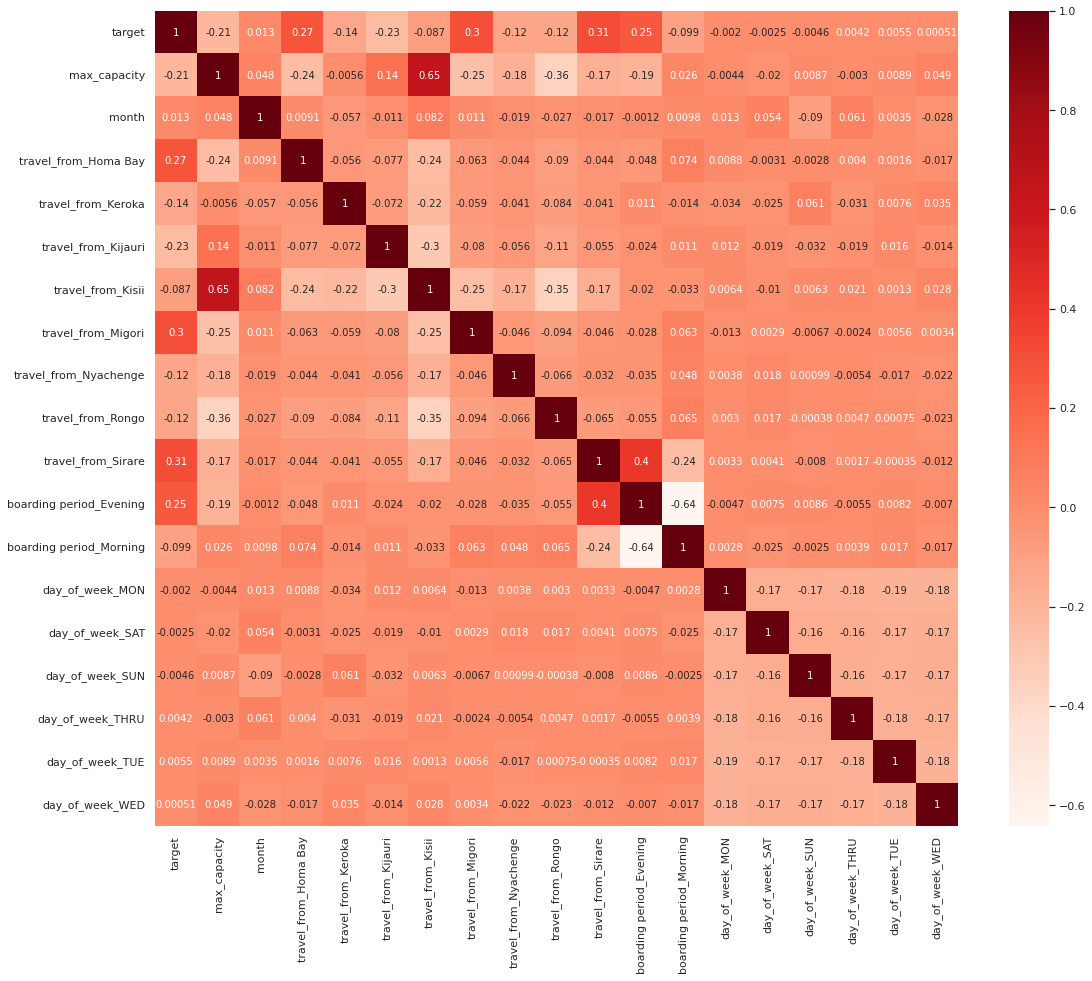

In [ ]:
#Using Pearson Correlation
plt.figure(figsize=(18,15))
cor = final_df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#**Model Building**

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
y = final_df['target']
X = final_df.drop(['target'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train.shape, X_test.shape


((4999, 18), (1250, 18))

##**Linear Regression**

In [ ]:
from sklearn import metrics

#Evaluate matrices
def print_evaluate(true, predicted):  
    '''This function will print the evaluation matrics values 
    '''
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    


In [ ]:

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
LR_model = LinearRegression(normalize=True)
LR_model.fit(X_train,y_train)
print(LR_model.coef_,"\n","Intercept/offset",LR_model.intercept_)
print("\n")
LR_test_pred = LR_model.predict(X_test)

LR_train_pred = LR_model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, LR_test_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, LR_train_pred)
print("Adjusted R2:-",1 - (1-LR_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))



[ 0.52421494  0.17019834  7.63324631 -7.49844148 -8.53076062 -2.96675152
  8.02747512 -7.35047361 -4.52375998  8.53608601 10.31789208  2.14333173
  0.06990653 -0.23044437  0.12003174 -0.02050588  0.023074    0.27205088] 
 Intercept/offset 7.625298585740459


Test set evaluation:
_____________________________________
MAE: 4.718854763778601
MSE: 45.5536585049284
RMSE: 6.749345042663651
R2 Square 0.4064403071228253
__________________________________
Adjusted R2:- 0.39776112396133945

____________________________________________
Train set evaluation:
_____________________________________
MAE: 4.802389665354505
MSE: 47.55058004323577
RMSE: 6.895692861724322
R2 Square 0.3567522264370302
__________________________________
Adjusted R2:- 0.35442723448439295


Text(0.5, 0, 'Index')

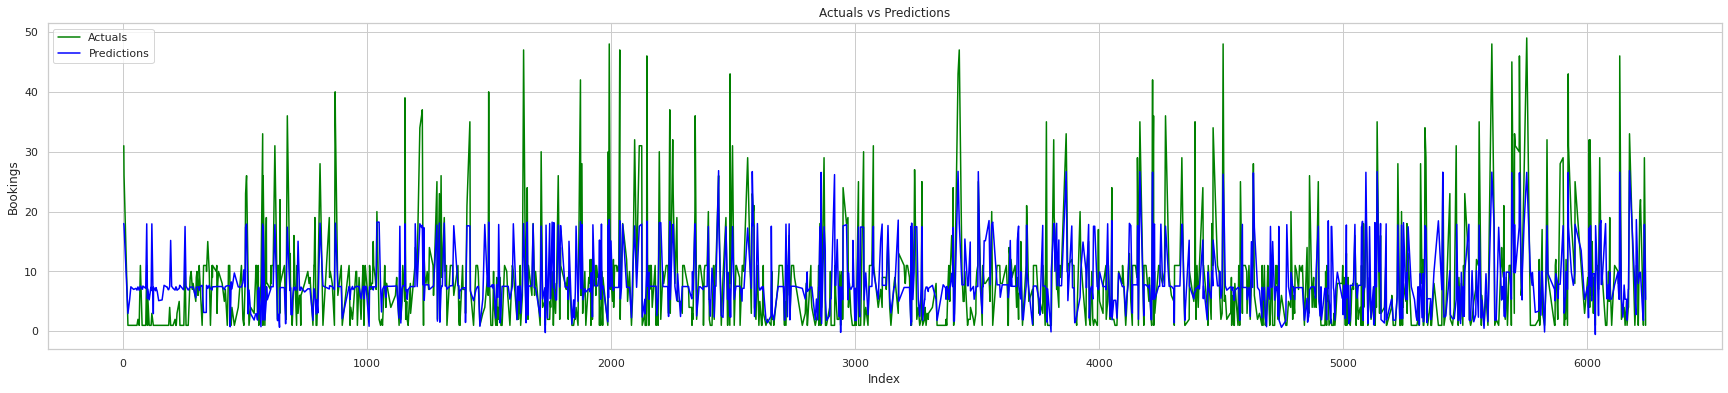

In [ ]:
fig, ax=plt.subplots(figsize=(30,6))
sns.lineplot(x=y_test.index,y=y_test,label='Actuals',color='green',ax=ax)
sns.lineplot(x=y_test.index,y=LR_test_pred,label='Predictions',color='blue',ax=ax)
ax.set_title('Actuals vs Predictions')
ax.set_ylabel('Bookings')
ax.set_xlabel('Index')

**Finding:** Linear Regression Model have not been able to predict well.

#SVM
* Support Vector Machine can also be used as a regression method, maintaining all the main features that characterize the algorithm (maximal margin).
*The Support Vector Regression (SVR) uses the same principles as the SVM for classification, with only a few minor differences. 
* The main idea is to minimize error, individualizing the hyperplane which maximizes the margin, keeping in mind that part of the error is tolerated.

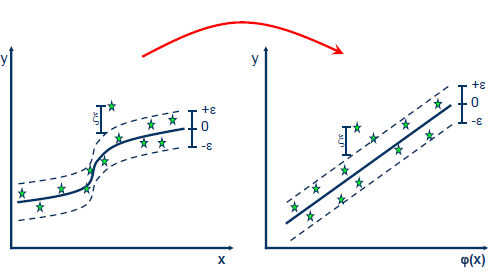


In [ ]:
from sklearn.svm import SVR
#C parameter in SVM is Penalty parameter of the error term. 
svm_reg = SVR(kernel='rbf', C=100, epsilon=0.1)#The value of epsilon determines the width of the tube around the estimated function (hyperplane).
svm_reg.fit(X_train, y_train)

svr_test_pred = svm_reg.predict(X_test)
svr_train_pred = svm_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, svr_test_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print("\n____________________________________________")
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, svr_train_pred)
print("Adjusted R2:-",1 - (1-svm_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.495427028683509
MSE: 51.06059577012714
RMSE: 7.14566972159553
R2 Square 0.33468545583087916
__________________________________
Adjusted R2:- 0.32495705469761826

____________________________________________
Train set evaluation:
_____________________________________
MAE: 4.081209517583264
MSE: 44.85062062307435
RMSE: 6.69706059574455
R2 Square 0.39327634210817564
__________________________________
Adjusted R2:- 0.39108336503145824


#Decision Treee Regressor

In [ ]:
from sklearn.tree import DecisionTreeRegressor

DT_reg = DecisionTreeRegressor(random_state = 0,max_depth=50,max_leaf_nodes=50)
DT_reg.fit(X_train,y_train)

DT_test_pred = DT_reg.predict(X_test)
DT_train_pred = DT_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, DT_test_pred)
print("Adjusted R2:-",1 - (1-DT_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, DT_train_pred)
print("Adjusted R2:-",1 - (1-DT_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.597069511322139
MSE: 46.27610236372469
RMSE: 6.802654067621305
R2 Square 0.3970269346512876
__________________________________
Adjusted R2:- 0.3882101067257987
Train set evaluation:
_____________________________________
MAE: 4.437400515023363
MSE: 41.88689246538063
RMSE: 6.4720083795820775
R2 Square 0.4333686298815097
__________________________________
Adjusted R2:- 0.43132056468831037


#Random Forest
* A Random Forest is an ensemble technique capable of performing both regression and classification tasks with the use of multiple decision trees.
* It is a technique called Bootstrap Aggregation, commonly known as bagging.

* Bagging, in the Random Forest method, involves training each decision tree on a different data sample where sampling is done with replacement.
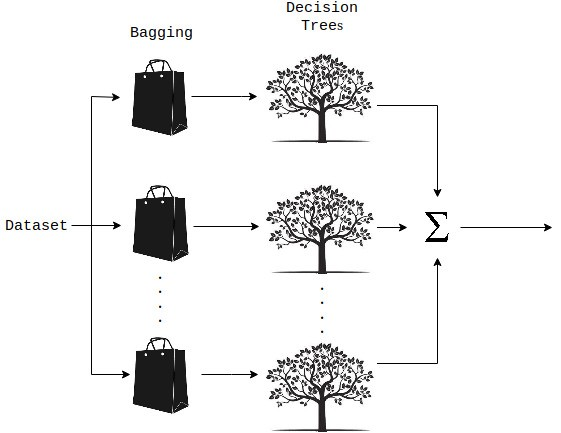




In [ ]:
from sklearn.ensemble import RandomForestRegressor
RDM_forest_reg = RandomForestRegressor(n_estimators =1500)
RDM_forest_reg.fit(X_train, y_train)
RDM_test_pred = RDM_forest_reg.predict(X_test)
RDM_train_pred = RDM_forest_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, RDM_test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_reg.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, RDM_train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_reg.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

Test set evaluation:
_____________________________________
MAE: 4.6236708648627936
MSE: 48.31790589027029
RMSE: 6.951108249068654
R2 Square 0.3704224353880544
__________________________________
Adjusted R2:- 0.3612165896016897
Train set evaluation:
_____________________________________
MAE: 4.295999926315778
MSE: 40.1250446578296
RMSE: 6.334433254666877
R2 Square 0.457202296653472
__________________________________
Adjusted R2:- 0.45524037724378574


**Random Forest with HyperParameter Parameter tuning.**


In [ ]:
#Parameter
n_estimators = [500] # number of trees in the random forest
max_features = [0.4,0.5,0.6,0.7,0.8,0.9,1] 
# number of features in consideration at every split
max_samples = [0.4,0.5,0.6,0.7,0.8,0.9,1]
max_depth = [50,70,90,110] # maximum number of levels allowed in each decision tree
# min_samples_split = [2, 6, 10] # minimum sample number to split a node
min_samples_leaf = [1,2,3,4,5,6, 7,8,9,10,11,12,13,14,15]
# min_samples_leaf = [1, 3, 4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators,

'max_features': max_features,

'max_depth': max_depth,

# 'min_samples_s': min_samples_,

'min_samples_leaf': min_samples_leaf,
"max_samples" : max_samples,

'bootstrap': bootstrap}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rf_random = RandomizedSearchCV(estimator =RDM_forest_reg ,param_distributions = random_grid,
               n_iter = 100, cv = 3, verbose=2, random_state=35, n_jobs = -1)


rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_estimators=1500),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [50, 70, 90, 110],
                                        'max_features': [0.4, 0.5, 0.6, 0.7,
                                                         0.8, 0.9, 1],
                                        'max_samples': [0.4, 0.5, 0.6, 0.7, 0.8,
                                                        0.9, 1],
                                        'min_samples_leaf': [1, 2, 3, 4, 5, 6,
                                                             7, 8, 9, 10, 11,
                                                             12, 13, 14, 15],
                                        'n_estimators': [500]},
                   random_state=35, verbose=2)

In [ ]:
# print the best parameters
print ('Best Parameters: ', rf_random.best_params_)

Best Parameters:  {'n_estimators': 500, 'min_samples_leaf': 9, 'max_samples': 0.4, 'max_features': 0.9, 'max_depth': 50, 'bootstrap': True}


In [ ]:
RDM_forest_hyper = RandomForestRegressor(n_estimators = 500, min_samples_leaf = 13,max_samples=0.5, max_features = 0.6, max_depth= 50, bootstrap=True) 
RDM_forest_hyper.fit( X_train, y_train) 

RDM_hyper_test_pred = RDM_forest_hyper.predict(X_test)
RDM_hyper_train_pred = RDM_forest_hyper.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, RDM_hyper_test_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, RDM_hyper_train_pred)
print("Adjusted R2:-",1 - (1-RDM_forest_hyper.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))


Test set evaluation:
_____________________________________
MAE: 4.553708379759406
MSE: 43.93138717230385
RMSE: 6.628075676416485
R2 Square 0.42757834313483734
__________________________________
Adjusted R2:- 0.41920824579643523
Train set evaluation:
_____________________________________
MAE: 4.517098320736862
MSE: 43.17759639380202
RMSE: 6.570966168974089
R2 Square 0.4159084342849233
__________________________________
Adjusted R2:- 0.41379725995101335


#XGB(Extreme Gradient Boosting)
* XGBoost is an implementation of the Gradient Boosted Decision Trees algorithm What is Gradient Boosted Decision Trees? We'll walk through a diagram.

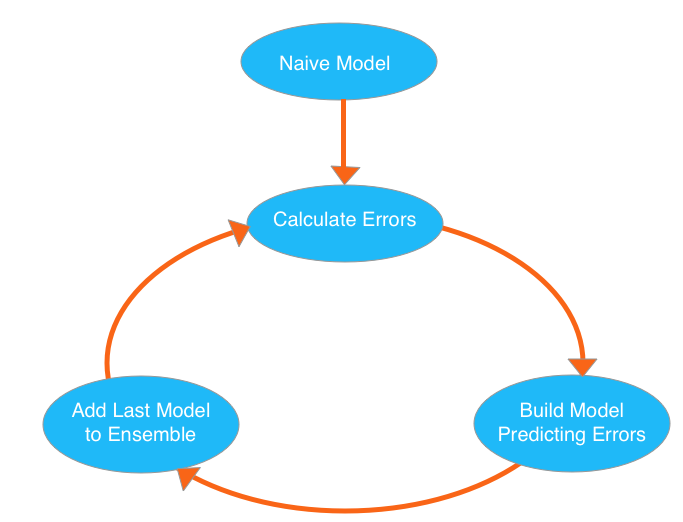

* We start the cycle by calculating the errors for each observation in the dataset. We then build a new model to predict those. We add predictions from this error-predicting model to the "ensemble of models."

* To make a prediction, we add the predictions from all previous models. We can use these predictions to calculate new errors, build the next model, and add it to the ensemble.

* There's one piece outside that cycle. We need some base prediction to start the cycle. In practice, the initial predictions can be pretty naive. Even if it's predictions are wildly inaccurate, subsequent additions to the ensemble will address those errors.




In [ ]:
import xgboost as xgb
XGB= xgb.XGBRegressor(
                        # booster= 'gbtree',
                        # colsample_bylevel= 1,
                        # colsample_bynode= 1,
                        # colsample_bytree= 0.7,
                        # eta= 0.004,
                        # gamma= 0,
                        # importance_type= 'gain',
                        # learning_rate= 0.1,
                        # max_delta_step= 0,
                        # max_depth= 9,
                        # min_child_weight= 10,
                        # n_estimators= 100,
                        # n_jobs= 1,
                        # objective= 'reg:linear',
                        # random_state= 0,
                        # reg_alpha= 0,
                        # reg_lambda= 1,
                        # scale_pos_weight= 1,
                        # subsample= 1,
                        # verbosity= 1
                      )
XGB.fit(X_train, y_train)
XGB_train_pred=XGB.predict(X_train)
XGB_test_pred = XGB.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, XGB_test_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, XGB_train_pred)
print("Adjusted R2:-",1 - (1-XGB.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  

[18:49:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.634022001838684
MSE: 44.1776181675973
RMSE: 6.646624569478654
R2 Square 0.42436997746806193
__________________________________
Adjusted R2:- 0.41595296657807423
Train set evaluation:
_____________________________________
MAE: 4.560640153085549
MSE: 43.143770109436424
RMSE: 6.568391744516798
R2 Square 0.4163660245411577
__________________________________
Adjusted R2:- 0.4142565041479329


In [ ]:
#Hyperparameter
params = {"min_child_weight":[10,20], 
            'eta': [0.004,0.04,4,40], 
            'colsample_bytree':[0.7], 
            'max_depth': [7,9,11],
          
          }

import xgboost as xgb

xgb = xgb.XGBRegressor(random_state=0)          

In [ ]:
#Grid search
from sklearn.model_selection import GridSearchCV

reg_gs = GridSearchCV(xgb,param_grid=params, verbose=1,cv=3)
reg_gs.fit(X_train, y_train)

Fitting 3 folds for each of 24 candidates, totalling 72 fits
[18:50:34] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:37] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:38] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[18:50:39] WARNING: /workspace/src/objective/regre

GridSearchCV(cv=3, estimator=XGBRegressor(),
             param_grid={'colsample_bytree': [0.7], 'eta': [0.004, 0.04, 4, 40],
                         'max_depth': [7, 9, 11],
                         'min_child_weight': [10, 20]},
             verbose=1)

In [ ]:
#best parameter.
reg_gs.best_estimator_.get_params()

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.7,
 'eta': 0.004,
 'gamma': 0,
 'importance_type': 'gain',
 'learning_rate': 0.1,
 'max_delta_step': 0,
 'max_depth': 7,
 'min_child_weight': 20,
 'missing': None,
 'n_estimators': 100,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:linear',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 1,
 'verbosity': 1}

In [ ]:
#Optimising XGB with Best Hyperparameter.
XGB_optimal_model =reg_gs.best_estimator_

XGB_optimal_model.fit(X_train, y_train)
XGB_hyper_train_pred=XGB_optimal_model.predict(X_train)
XGB_hyper_test_pred = XGB_optimal_model.predict(X_test)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, XGB_hyper_test_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, XGB_hyper_train_pred)
print("Adjusted R2:-",1 - (1-XGB_optimal_model.score(X_train, y_train))*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1))

  

[18:52:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test set evaluation:
_____________________________________
MAE: 4.5800017818927765
MSE: 45.07221524280756
RMSE: 6.713584381148982
R2 Square 0.41271346550748755
__________________________________
Adjusted R2:- 0.40412601008842564
Train set evaluation:
_____________________________________
MAE: 4.418203845760254
MSE: 41.67653978287065
RMSE: 6.455736966673181
R2 Square 0.4362142080966338
__________________________________
Adjusted R2:- 0.43417642812589874


In [ ]:
#ML Algorithms Comparision.
MLA_columns = {
               "LinearRegression":[round(metrics.r2_score(y_test,LR_test_pred)*100,2),round(metrics.r2_score(y_train,LR_train_pred)*100,2)],
               "SVM_Regressor":[round(metrics.r2_score(y_test,svr_test_pred)*100,2),round(metrics.r2_score(y_train,svr_train_pred)*100,2)],
               "DT_Regressor":[round(metrics.r2_score(y_test,DT_test_pred)*100,2),round(metrics.r2_score(y_train,DT_train_pred)*100,2)],
               "Random_forest":[round(metrics.r2_score(y_test,RDM_test_pred)*100,2),round(metrics.r2_score(y_train,RDM_train_pred)*100,2)] ,            
                "Random_forest_Hyper":[round(metrics.r2_score(y_test,RDM_hyper_test_pred)*100,2),round(metrics.r2_score(y_train,RDM_hyper_train_pred)*100,2)],
                "XGB":[round(metrics.r2_score(y_test,XGB_test_pred)*100,2),round(metrics.r2_score(y_train,XGB_train_pred)*100,2)],
                "XGB_Hyper":[round(metrics.r2_score(y_test,XGB_hyper_test_pred)*100,2),round(metrics.r2_score(y_train,XGB_hyper_train_pred)*100,2)],
               }
              
MLA_compare = pd.DataFrame(MLA_columns,index = ["Test_R2","Train_R2"])
MLA_compare.T

,Test_R2,Train_R2
LinearRegression,40.64,35.68
SVM_Regressor,33.47,39.33
DT_Regressor,39.70,43.34
Random_forest,37.04,45.72
Random_forest_Hyper,42.76,41.59
XGB,42.44,41.64
XGB_Hyper,41.27,43.62


**Conclusion**
* Data set is complex and challenging to work with.
* Independent and dependent variable are not following any of the linearity asuumptions.
* Feature selection help us greatly in reducing the overfiting.
* we have applied basic to advance ensemble models over our dataset non of them able to predict more than 46%.

* Out of the total models we trained we are able to fetch better result with Tree base algorithms only and thats too with very sort margin.

* The obious reason behind this low accuracy is the dataset which has features which does not follow any of the linearity assumptions.

* The other major reason could be lack of proper availability of important features.
